<a href="https://colab.research.google.com/github/viviantram03/labb-1/blob/main/Lab2.1-decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Structure of Lab 2

- **1. Decision Tree**
  - **Part 1: ID3 (from scratch) — placeholders 1–13**
    - Use the **Baseball** train and test datasets (Canvas → Lab section).
    - **Notes**
      - Print the **information gain (IG)** for all features and compare them.
      - Build and **visualize the decision tree**.
      - **Compute predictions** on the test set.
    - **Also:** Fill out all **16 placeholders** in the code and **answer 3 questions**.
  - **Part 2: Decision Tree (scikit-learn) — Regression**
    - Use the **Energy** train and test datasets.
    - **Tasks**
      - **Visualize** the tree at **four different depths**.
      - **Compare** their final **errors**.
      - **State** which **depth performs best** for this dataset.

- **2. SVM**
  - Proceed through the code, **answering 6 questions** one by one in **separate cells**, each inserted **after its corresponding question**.
  - For **Questions 1–5**,  use the**created dataset** .
  - For **Question 6**, use the **ex2data2.txt** dataset
  
  ( All data available on GitHub).


# <font color='#TTE99D'>**Decision Trees 🌵**</font>

## **🔸 Imports**

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import base64
from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from sklearn import tree  #Importing directly (Not from scratch)

## **🔸 Part 1: ID3 (from Scratch)**

### Data

In [80]:

data_url = "https://raw.githubusercontent.com/Azadshokrollahi/Artificial-intelligence-for-data-science-/refs/heads/main/Lab2-Data/baseball.csv"

data = pd.read_csv(data_url)                  #(1) read baseball train dataset with pandas
data





,Outlook,Temperature,Humidity,Wind,Play Golf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [81]:
data.columns = ['outlook', 'temperature', 'humidity', 'wind', 'play']
data

,outlook,temperature,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


### Model

####  Entropy

\begin{align}
\text{Entropy}(Y) = -\sum_{i=1}^{C} p_i \log_2(p_i)
\end{align}

In [82]:
labels = data['play']
len(labels), labels.unique(), labels.value_counts()
p = labels.value_counts() / len(labels)
-sum(p * np.log2(p))

0.9402859586706311

In [83]:
# TODO: Implement entropy(labels) -> float
def entropy(labels):
    """
    Compute entropy H(Y) for a Pandas Series of labels.
    HINT: use value_counts(normalize=True) and -sum(p*log2(p))
    """
    # TODO begin
    p = labels.value_counts(normalize=True)                        #(2)
    return -sum(p * np.log2(p))                                    #(3)
    # TODO end

# quick check
entropy(data['play'])

0.9402859586706311

####  Information Gain: now you have to calculate IG for all features

\begin{align}
\text{Information Gain}(\text{Feature}) = \text{Entropy}(\text{Parent}) - \sum_{\text{value} \in \text{Feature}} \frac{|\text{Subset with value}|}{|\text{Parent}|} \times \text{Entropy}(\text{Subset with value})
\end{align}

In [84]:
target = 'play'
entropy_parent = entropy(data[target])
entropy_parent

entropy_child = 0
feature = 'wind'
for value in data[feature].unique():
    subset = data[data[feature] == value]
    display(subset)
    wi = len(subset) / len(data)
    entropy_child += wi * entropy(subset[target])
information_gain = entropy_parent - entropy_child

print(information_gain)

,outlook,temperature,humidity,wind,play
0,Sunny,Hot,High,Weak,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes
12,Overcast,Hot,Normal,Weak,Yes


,outlook,temperature,humidity,wind,play
1,Sunny,Hot,High,Strong,No
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
10,Sunny,Mild,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
13,Rain,Hot,High,Strong,No


0.04812703040826949


In [85]:
# TODO: Implement information_gain(data, feature, target) -> float

def information_gain(data, feature, target):
    """
    IG = H(parent) - sum_v (|Dv|/|D|)*H(Dv)
    """
    # TODO begin
    # Entropy of parent
    entropy_parent = entropy(data[target])                           #(4)

    # Entropy of child
    entropy_child = 0.0
    for value in data[feature].unique():
        subset = data[data[feature] == value]                        #(5)
        wi = len(subset) / len(data)                                 #(6)
        entropy_child += wi * entropy(subset[target])
    return entropy_parent - entropy_child
    # TODO end

<font color='#GG15D'>**Question1:**</font> <font color='#EE15D'>: Now, you should calculate IG for all features and say which one is more important**

In [86]:
print("IG(wind):", information_gain(data, 'wind', 'play'))
print("IG(humidity):", information_gain(data, 'humidity', 'play'))
print("IG(outlook):", information_gain(data, 'outlook', 'play'))
print("IG(temperature):", information_gain(data, 'temperature', 'play'))


IG(wind): 0.04812703040826949
IG(humidity): 0.15183550136234159
IG(outlook): 0.24674981977443933
IG(temperature): 0.10389267691729642


<font color='#GG15D'>**Question1:**</font> <font color='#EE15D'> Answer: After calculating the information gain for all features, we can see that "outlook" has the highest value (0.2467), making it the most important factor in prediciting whether the team will play or not.

####  Decision Tree & Node

Based on the following images, you need a Node class and a make_tree function. The Node class is already written, and you are expected to fill in the make_tree function


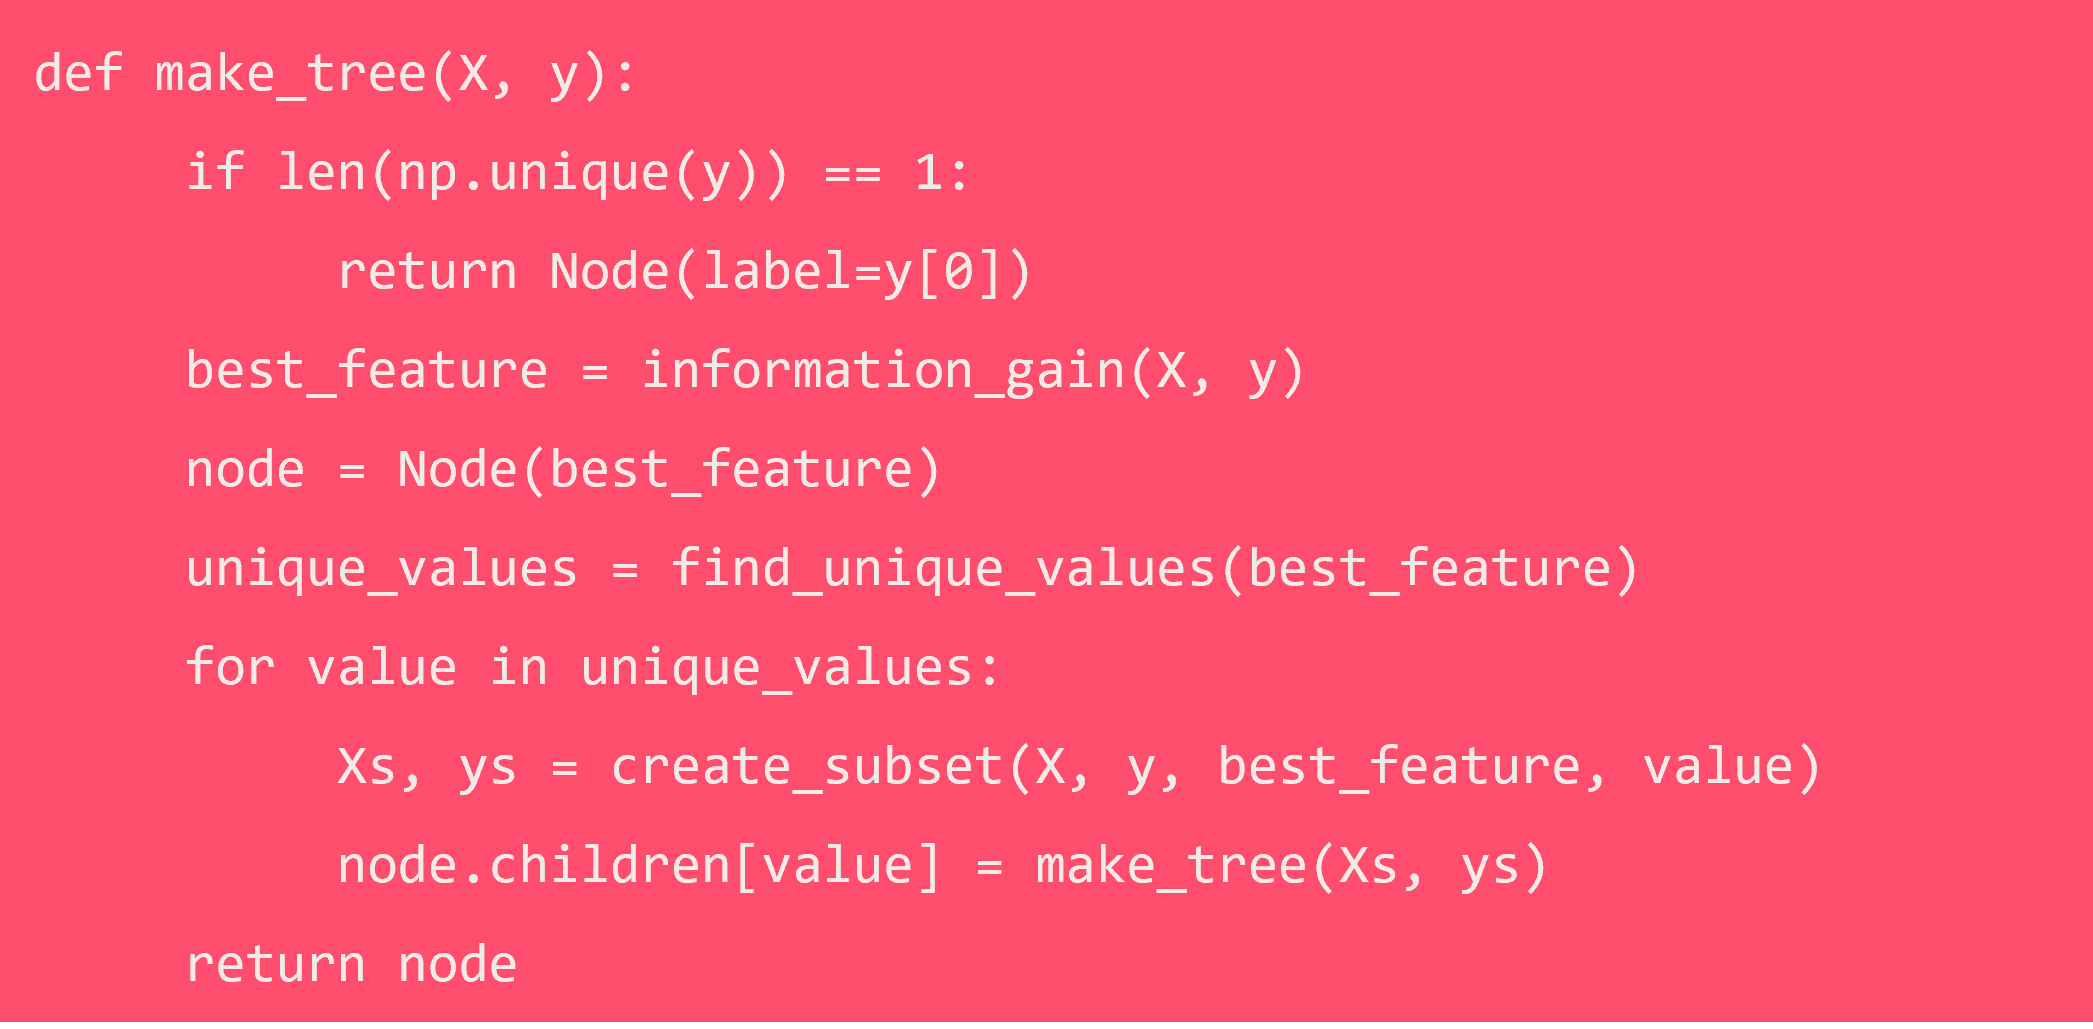
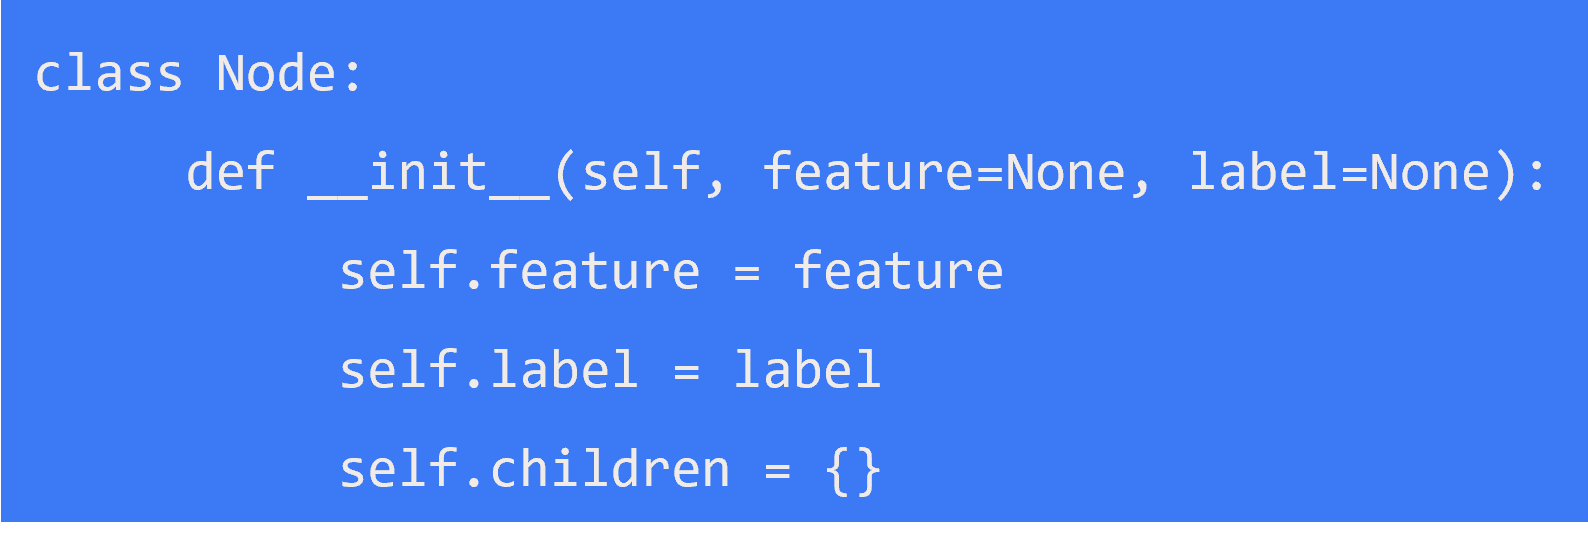

In [87]:
import os, base64
from IPython.display import HTML, display

def embed_image(path, width=200):
    assert os.path.exists(path), f"Not found: {path}"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("ascii")
    return f'<img src="data:image/png;base64,{b64}" width="{width}"/>'

def show_images(paths, width=200, gap=10):
    imgs = "".join(embed_image(p, width) for p in paths)
    html = f'<div style="display:flex; gap:{gap}px;">{imgs}</div>'
    display(HTML(html))

show_images(
    ["/content/decision-tree.png", "/content/node.png"],
    width=500,
    gap=15
)


In [88]:
class Node:

    def __init__(self, feature=None, label=None):
        self.feature = feature
        self.label = label
        self.children = {}

    def __repr__(self):
        if self.feature is not None:
            return f'DecisionNode(feature="{self.feature}", children={self.children})'
        else:
            return f'LeafNode(label="{self.label}")'

Node(feature='wind')
# Node(label='yes')

DecisionNode(feature="wind", children={})

<font color='#EE15D'>**Fill out make_tree function**

In [89]:
# TODO: Implement make_tree(data, target) -> Node
def make_tree(data, target):
    """
    Recursively build an ID3 tree.
    Base cases:
      - if all labels same -> leaf(label)
      - if no features left -> leaf(majority class)
    Otherwise:
      - choose feature with max IG
      - for each value of that feature, build subtree on the subset (drop that feature)
    """
    # TODO begin
    # leaf node?
    if len(data[target].unique()) == 1:
        return Node(label=data[target].iloc[0])

    features = data.drop(target, axis=1).columns
    if len(features) == 0 or len(data) == 0:
        return Node(label=data[target].mode()[0])

    # calculate information gain
    gains = [information_gain(data, feature, target) for feature in features]                   #(7)

    # greedy search to find best feature
    max_gain_idx = np.argmax(gains)
    best_feature = features[max_gain_idx]                                                       #(8)

    # make a node
    node = Node(feature=best_feature)

    # loop over the best feature
    for value in data[best_feature].unique():                                                   #(9)
        subset = data[data[best_feature] == value].drop(best_feature, axis=1)                   #(10)
        node.children[value] = make_tree(subset, target)

    return node
    # TODO end

In [90]:
tree_root = make_tree(data, 'play')
print("Root feature:", tree_root.feature)

Root feature: outlook


### Evaluation

In [91]:
data_test = pd.read_csv('https://raw.githubusercontent.com/Azadshokrollahi/Artificial-intelligence-for-data-science-/refs/heads/main/Lab2-Data/baseball-test.csv')
data_test.columns = ['outlook', 'temperature', 'humidity', 'wind', 'play']
data_test




,outlook,temperature,humidity,wind,play
0,Overcast,Mild,High,Weak,Yes
1,Rain,Cool,Normal,Strong,No
2,Sunny,Hot,Normal,Weak,Yes


In [92]:
# TODO : Implement predict(node, sample_dict) -> label
def predict(node, sample):
    """
    Predict class for one sample (dict-like).
    If unseen branch happens, you may fallback to current node's label (or majority of subtree).
    """

    if node.feature is None:
        return node.label                                                                    #(11)

    feature_value = sample[node.feature]

    if feature_value in node.children:
        return predict(node.children[feature_value], sample)
    else:
        # simple fallback: return current node's most frequent descendant label
        return data['play'].mode()[0]                                                        #(12)


preds = [predict(tree_root, sample.to_dict()) for _, sample in data_test.iterrows()]         #(13)
print("Predictions:", preds)
print("True labels:", data_test['play'].tolist())

Predictions: ['Yes', 'No', 'Yes']
True labels: ['Yes', 'No', 'Yes']


<font color='#GG15D'>**Question2:**</font> <font color='#EE15D'> Visulize the tree

### Visualization

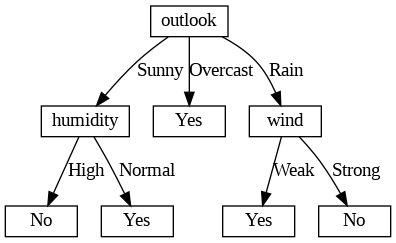

In [93]:
from graphviz import Digraph, nohtml

g = Digraph('g', filename='decision-tree.gv', node_attr={'shape': 'record', 'height': '.1'})

def plot_tree(tree, g):
    root_node = tree.feature
    if root_node is None:
        return g
    g.node(root_node, nohtml(root_node))
    child_nodes = tree.children.keys()
    for i, child in enumerate(child_nodes):
        node = tree.children[child]
        name = node.feature if node.feature is not None else child+node.label
        label = node.feature if node.feature is not None else node.label
        g.node(name, nohtml(label))
        g.edge(root_node, name, label=child)
        plot_tree(node, g)
    return g

g = plot_tree(tree_root, g)
g.render('decision_tree', format='png', view=False)
display(Image(filename='decision_tree.png'))


<font color='#GG15D'>**Question2:**</font> <font color='#EE15D'> Answer: When the ID3 tree is visualized, it can be seen that the root of the tree is outlook, which aligns with it being the most informative feature. Each bransch from the root represents one of the possible values of outlook (Sunny, Overcast, Rain), and at each leaf node, the predicted label for the target variabe play (Yes or No) is shown. The tree clearly demonstrates how decisions are made, depending on the value of outlook and other features like humidity or wind, one can follow the path to predict whether the team will play or not.

## **🔸 Part 2: Decision Tree (sklearn): Regression**

In [94]:
from sklearn import tree

### Regression

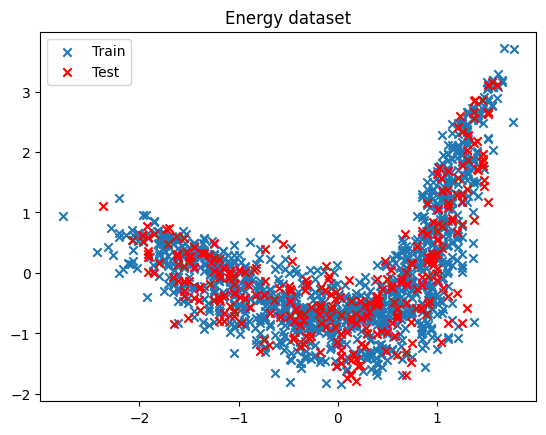

In [101]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Azadshokrollahi/Artificial-intelligence-for-data-science-/refs/heads/main/Lab2-Data/energy-train-l.csv', header=0)     #(14) read csv train energy dataset with pandas
train_set = np.array(df_train)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df_test = pd.read_csv('https://raw.githubusercontent.com/Azadshokrollahi/Artificial-intelligence-for-data-science-/refs/heads/main/Lab2-Data/energy-test-l.csv', header=0)           #(15) read csv test energy dataset with pandas
test_set = np.array(df_test)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

plt.scatter(x_train.ravel(), y_train, marker='x')
plt.scatter(x_test.ravel(), y_test, c='r', marker='x')

plt.legend(['Train', 'Test'])
plt.title("Energy dataset")
plt.show()

<font color='#GG15D'>**Question3:**</font> <font color='#EE15D'> change the depth of the tree (1,2,3,4) and compare the data points and the trees

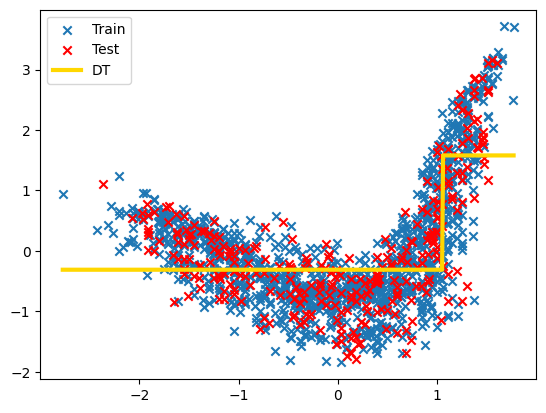

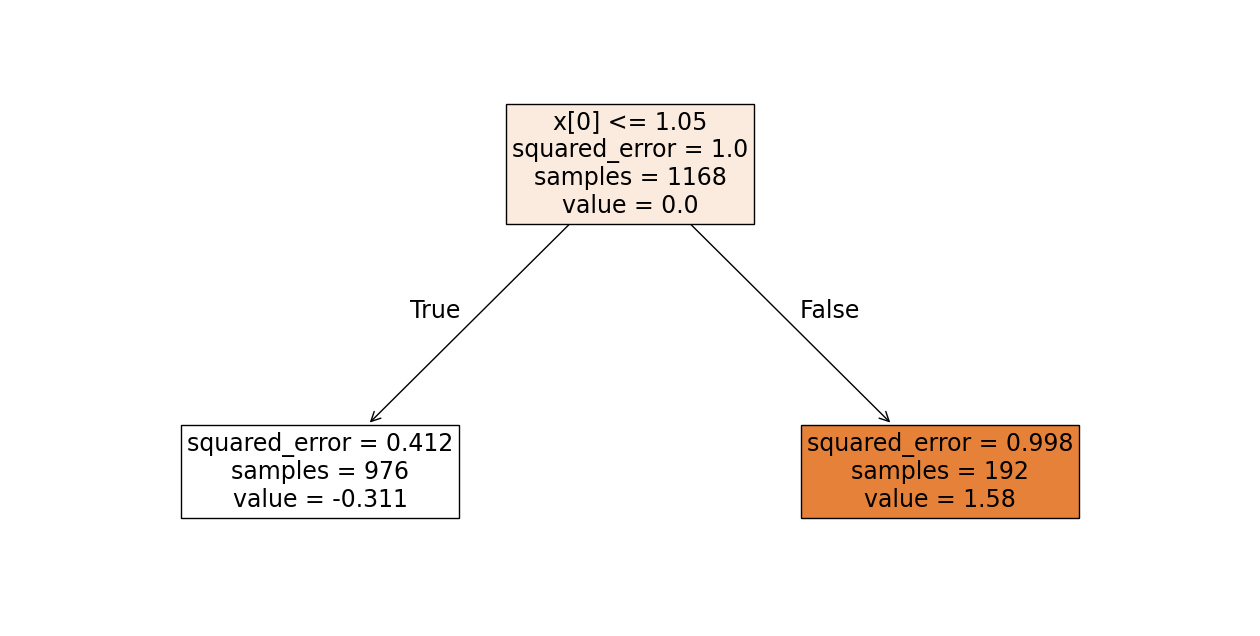

Depth=1: Train R^2=0.491, Test R^2=0.479


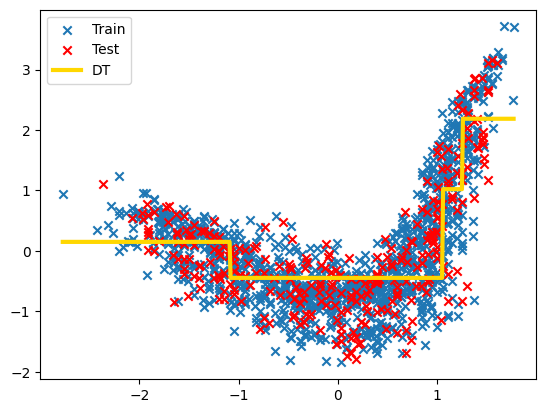

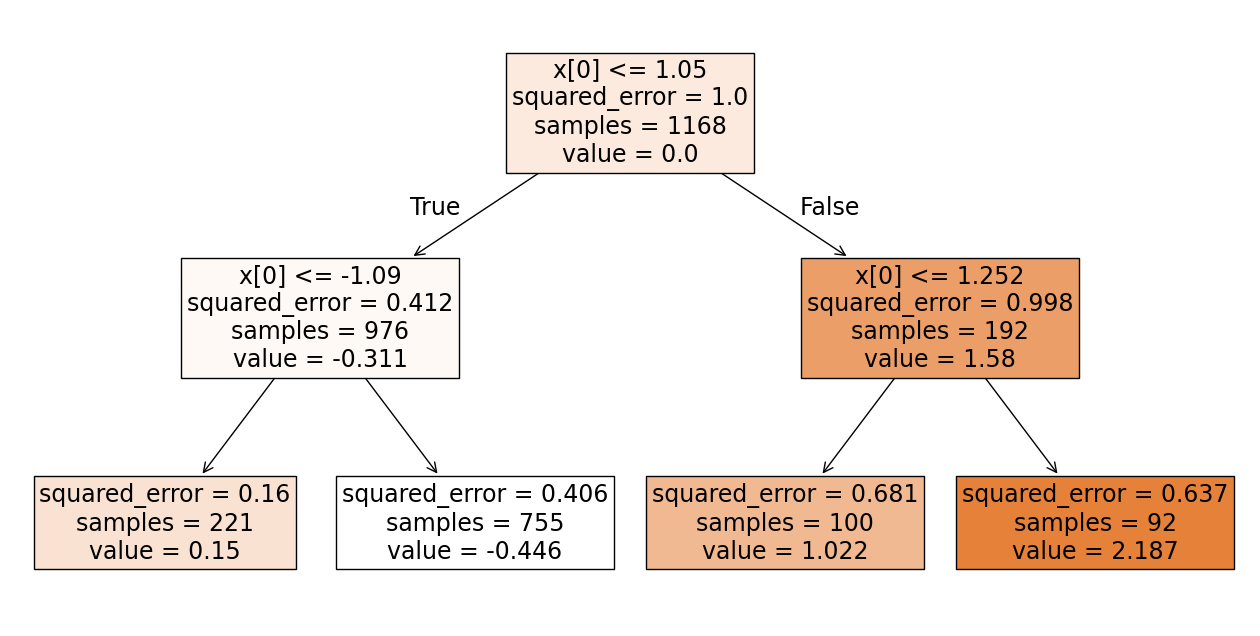

Depth=2: Train R^2=0.599, Test R^2=0.538


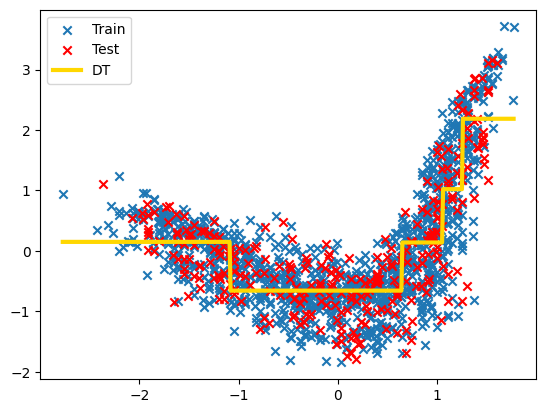

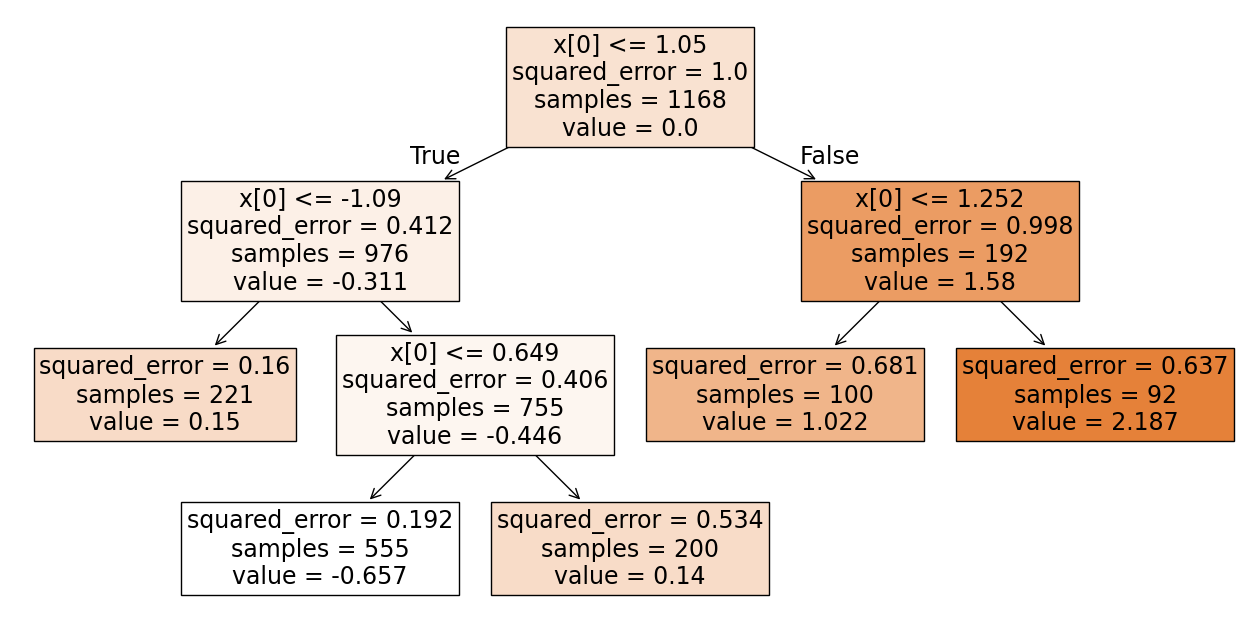

Depth=3: Train R^2=0.679, Test R^2=0.610


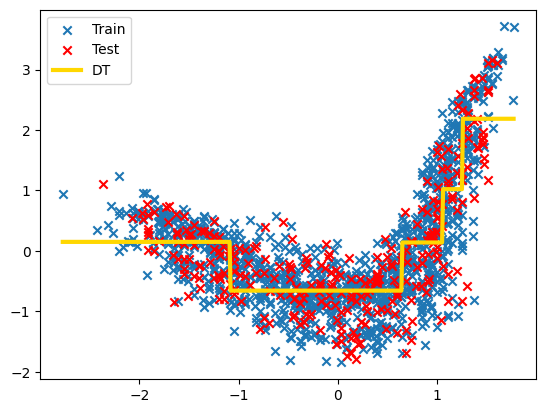

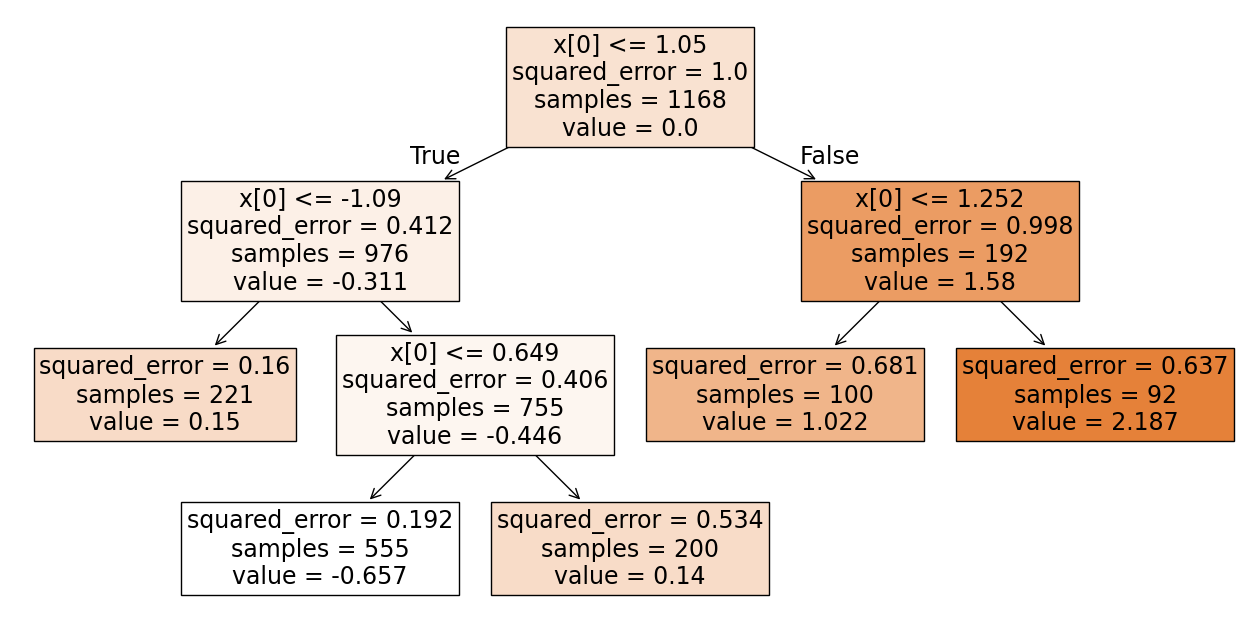

Depth=4: Train R^2=0.679, Test R^2=0.610


In [113]:
depths = [1,2,3,4]
                                                                #(16) different depths
for depth in depths:
  reg = tree.DecisionTreeRegressor(max_depth=depth, ccp_alpha=0.05)
  reg.fit(x_train, y_train)

# Generate data points for plotting
  xp = np.arange(x_train.min(), x_train.max(), 0.01)[:, np.newaxis]
  yp = reg.predict(xp)

  plt.scatter(x_train, y_train, marker='x')
  plt.scatter(x_test, y_test, c='r', marker='x')
  plt.plot(xp, yp, color='gold', linewidth=3)
  plt.legend(['Train', 'Test', 'DT'])
  plt.show()

  plt.figure(figsize=(16, 8))
  tree.plot_tree(reg, filled=True, fontsize=17);
  plt.show()

  print(f"Depth={depth}: Train R^2={reg.score(x_train, y_train):.3f}, Test R^2={reg.score(x_test, y_test):.3f}")



<font color='#GG15D'>**Question3:**</font> <font color='#EE15D'> Answer: